BerkeleyX: Data8.2x

Foundations of Data Science: Inferential Thinking by Resampling

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lec 6.1 Introduction

In [3]:
# Jury Selection in Alameda County
jury = Table().with_columns(
    'Ethnicity', ['Asian', 'Black', 'Latino', 'White', 'Other'],
    'Eligible', [0.15, 0.18, 0.12, 0.54, 0.01],
    'Panels', [0.26, 0.08, 0.08, 0.54, 0.04]
)
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


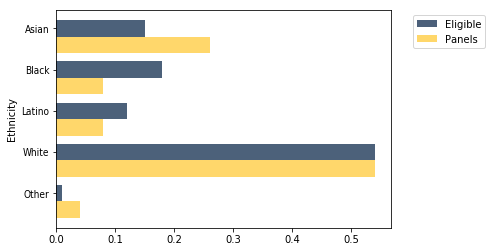

In [4]:
# there are differences between eligibility and actual panels
# are panels really selected at random?
jury.barh('Ethnicity')

Lec 6.2 Total Variation Distance

In [5]:
# how to evaluate the distance between two distributions?
# have a look at differences
jury_with_diffs = jury.with_column('Difference', jury.column('Panels') - jury.column('Eligible'))
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [7]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference')))
jury_with_diffs

# distance between distribution = Total Variation Distance
print(sum(jury_with_diffs.column('Absolute Difference')) / 2)

0.14


In [8]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [10]:
total_variation_distance(jury.column('Eligible'), jury.column('Panels'))

0.14

Lec 6.3 Assessment

In [12]:
# distribution of eligible population
eligible = jury.column('Eligible')

In [13]:
# use sample_proportions to get random samples from our distribution
#  datascience.sample_proportions(sample_size, probabilities)
#  (just a wrapper to np.random.multinomial(sample_size, probabilities) / sample_size)
panels_and_sample = jury.with_column('Random Sample', sample_proportions(1453, eligible))
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.143152
Black,0.18,0.08,0.181693
Latino,0.12,0.08,0.125258
White,0.54,0.54,0.536132
Other,0.01,0.04,0.0137646


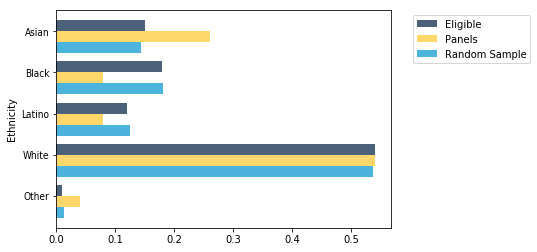

In [14]:
panels_and_sample.barh('Ethnicity')

In [18]:
# tvd from a random sample compared to the actual one
print(total_variation_distance(panels_and_sample.column('Random Sample'), eligible))
print(total_variation_distance(jury.column('Panels'), eligible))

0.010715760495526517
0.14


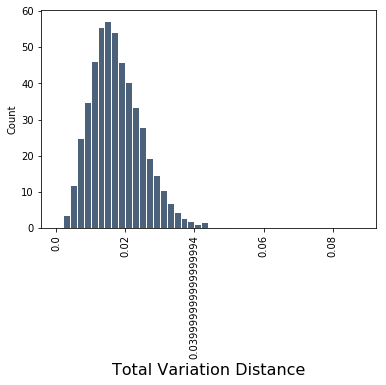

In [35]:
# let's check ten thousand random samples
tvds = []

repetitions = 10000
for i in range(repetitions):
    sample_distribution = sample_proportions(1453, eligible)
    tvds.append(total_variation_distance(sample_distribution, eligible))

Table().with_column('Total Variation Distance', tvds).hist(
    bins = np.arange(0, 0.09, 0.002), ec='w', normed=None, density=True)

# the actual tvd is way out of the expected range

Lec 6.4 Summary